In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
df = pd.read_csv("Groceries_dataset.csv")

In [4]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


cleaning the data and finding weather there is any null value or not

In [5]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df.rename(columns={'Member_number':'Trans_id'}, inplace=True)
df.rename(columns={'itemDescription':'items'}, inplace=True)

In [7]:
df

,Trans_id,Date,items
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


Grouping the data based on same Transaction id

In [8]:
group_df = df.groupby('Trans_id').agg({
    'items':list,
    'Date':'first'}).reset_index()

In [9]:
group_df

,Trans_id,items,Date
0,1000,"[soda, canned beer, sausage, sausage, whole mi...",27-05-2015
1,1001,"[frankfurter, frankfurter, beef, sausage, whol...",20-01-2015
2,1002,"[tropical fruit, butter milk, butter, frozen v...",26-04-2015
3,1003,"[sausage, root vegetables, rolls/buns, deterge...",10-02-2015
4,1004,"[other vegetables, pip fruit, root vegetables,...",02-12-2015
...,...,...,...
3893,4996,"[dessert, salty snack, rolls/buns, misc. bever...",24-10-2015
3894,4997,"[tropical fruit, white wine, whole milk, curd,...",27-12-2015
3895,4998,"[rolls/buns, curd]",14-10-2015
3896,4999,"[bottled water, butter milk, tropical fruit, b...",26-12-2015


In [10]:
group_df.isnull().sum()

Trans_id    0
items       0
Date        0
dtype: int64

In [11]:
group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Trans_id  3898 non-null   int64 
 1   items     3898 non-null   object
 2   Date      3898 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


Splitting data_set for training and testing of model


In [12]:
train_df, test_df = train_test_split(group_df, test_size=0.2)

In [13]:
train_df,test_df

(      Trans_id                                              items        Date
 1514      2563  [frozen meals, coffee, detergent, rolls/buns, ...  06-01-2015
 1680      2731        [ice cream, whole milk, grapes, newspapers]  11-04-2015
 1031      2057  [citrus fruit, tropical fruit, soda, UHT-milk,...  13-11-2015
 2762      3835  [whole milk, tropical fruit, yogurt, tropical ...  11-05-2015
 1606      2657  [pasta, bottled beer, hamburger meat, dessert,...  01-04-2015
 ...        ...                                                ...         ...
 2098      3158  [citrus fruit, bottled beer, hamburger meat, b...  04-10-2014
 2289      3354  [sausage, citrus fruit, yogurt, berries, pastr...  27-01-2015
 2525      3596  [hard cheese, other vegetables, nuts/prunes, r...  19-01-2015
 1138      2170  [canned beer, bottled beer, fish, citrus fruit...  18-06-2015
 2812      3889  [other vegetables, tropical fruit, soda, soda,...  23-12-2014
 
 [3118 rows x 3 columns],
       Trans_id         

In [20]:
train_df.head()

,Trans_id,items,Date
1514,2563,"[frozen meals, coffee, detergent, rolls/buns, ...",06-01-2015
1680,2731,"[ice cream, whole milk, grapes, newspapers]",11-04-2015
1031,2057,"[citrus fruit, tropical fruit, soda, UHT-milk,...",13-11-2015
2762,3835,"[whole milk, tropical fruit, yogurt, tropical ...",11-05-2015
1606,2657,"[pasta, bottled beer, hamburger meat, dessert,...",01-04-2015


In [22]:
train_df.columns

Index(['Trans_id', 'items', 'Date'], dtype='object')

train_df is our Trainning dataSet which is 80%,      
test_df is our  Testing dataSet which is 20%

In [25]:
te = TransactionEncoder()
train_encode = te.fit_transform(train_df['items'])
train_encode_items = pd.DataFrame(train_encode,columns=te.columns_)

In [27]:
train_encode_items.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=167)

In [28]:
df_final = pd.concat([train_df[['Trans_id', 'Date']].reset_index(drop=True), train_encode_items], axis=1)

In [29]:
df_final.columns

Index(['Trans_id', 'Date', 'Instant food products', 'UHT-milk',
       'abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'bags',
       'baking powder', 'bathroom cleaner',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=169)

Now we got our final data set, where we have converted our data to desired data set on which Apriori Algorithm will work

In [45]:
df_final = df_final.drop(columns=['Trans_id', 'Date'])

In [46]:
df_final.map(lambda x: isinstance(x,bool)).all().all()

True

In [47]:
frequent_itemset = apriori(df_final, min_support=0.01, use_colnames=True)

In [53]:
frequent_itemset

,support,itemsets
0,0.013791,(Instant food products)
1,0.080180,(UHT-milk)
2,0.028865,(baking powder)
3,0.114176,(beef)
4,0.081462,(berries)
...,...,...
2914,0.010263,"(root vegetables, rolls/buns, soda, whole milk..."
2915,0.011225,"(root vegetables, rolls/buns, yogurt, whole mi..."
2916,0.013470,"(rolls/buns, yogurt, sausage, whole milk, othe..."
2917,0.013149,"(rolls/buns, soda, yogurt, whole milk, other v..."


In [54]:
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bottled beer),(UHT-milk),0.159397,0.080180,0.014432,0.090543,1.129256,1.0,0.001652,1.011395,0.136165,0.064103,0.011267,0.135272
1,(UHT-milk),(bottled beer),0.080180,0.159397,0.014432,0.180000,1.129256,1.0,0.001652,1.025126,0.124438,0.064103,0.024510,0.135272
2,(bottled water),(UHT-milk),0.213919,0.080180,0.022130,0.103448,1.290207,1.0,0.004978,1.025954,0.286142,0.081368,0.025297,0.189724
3,(UHT-milk),(bottled water),0.080180,0.213919,0.022130,0.276000,1.290207,1.0,0.004978,1.085747,0.244537,0.081368,0.078975,0.189724
4,(UHT-milk),(brown bread),0.080180,0.136626,0.013149,0.164000,1.200357,1.0,0.002195,1.032744,0.181464,0.064567,0.031706,0.130122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14685,(rolls/buns),"(yogurt, whole milk, sausage, soda)",0.346376,0.017960,0.010584,0.030556,1.701290,1.0,0.004363,1.012992,0.630654,0.029918,0.012826,0.309921
14686,(soda),"(rolls/buns, yogurt, whole milk, sausage)",0.309173,0.023092,0.010584,0.034232,1.482452,1.0,0.003444,1.011536,0.471090,0.032901,0.011404,0.246283
14687,(yogurt),"(rolls/buns, whole milk, sausage, soda)",0.281591,0.022130,0.010584,0.037585,1.698425,1.0,0.004352,1.016059,0.572403,0.036105,0.015806,0.257923
14688,(sausage),"(rolls/buns, yogurt, whole milk, soda)",0.206222,0.024695,0.010584,0.051322,2.078205,1.0,0.005491,1.028067,0.653603,0.048035,0.027301,0.239947


In [58]:
rules[rules['confidence']>0.7]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2641,"(bottled beer, chocolate)",(whole milk),0.016036,0.448044,0.011546,0.720000,1.606986,1.0,0.004361,1.971273,0.383873,0.025514,0.492714,0.372885
5438,"(chocolate, fruit/vegetable juice)",(whole milk),0.015715,0.448044,0.011546,0.734694,1.639782,1.0,0.004505,2.080451,0.396392,0.025532,0.519335,0.380232
10318,"(rolls/buns, whole milk, UHT-milk)",(other vegetables),0.014753,0.378448,0.010584,0.717391,1.895615,1.0,0.005000,2.199339,0.479542,0.027661,0.545318,0.372679
10417,"(rolls/buns, bottled beer, bottled water)",(whole milk),0.015074,0.448044,0.010584,0.702128,1.567097,1.0,0.003830,1.852996,0.367416,0.023388,0.460334,0.362875
10445,"(rolls/buns, bottled beer, citrus fruit)",(whole milk),0.014432,0.448044,0.010263,0.711111,1.587147,1.0,0.003797,1.910618,0.375356,0.022695,0.476609,0.367009
10460,"(bottled beer, pastry, other vegetables)",(whole milk),0.016036,0.448044,0.011546,0.720000,1.606986,1.0,0.004361,1.971273,0.383873,0.025514,0.492714,0.372885
10599,"(rolls/buns, bottled beer, sausage)",(whole milk),0.017960,0.448044,0.013470,0.750000,1.673944,1.0,0.005423,2.207826,0.409972,0.029766,0.547066,0.390032
10613,"(rolls/buns, bottled beer, shopping bags)",(whole milk),0.015074,0.448044,0.010584,0.702128,1.567097,1.0,0.003830,1.852996,0.367416,0.023388,0.460334,0.362875
10655,"(rolls/buns, bottled beer, yogurt)",(whole milk),0.018922,0.448044,0.014753,0.779661,1.740145,1.0,0.006275,2.505033,0.433539,0.032624,0.600804,0.406294
10713,"(bottled water, brown bread, other vegetables)",(whole milk),0.017319,0.448044,0.012187,0.703704,1.570614,1.0,0.004428,1.862853,0.369709,0.026893,0.463189,0.365452


Trying to visulazise using graphs

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

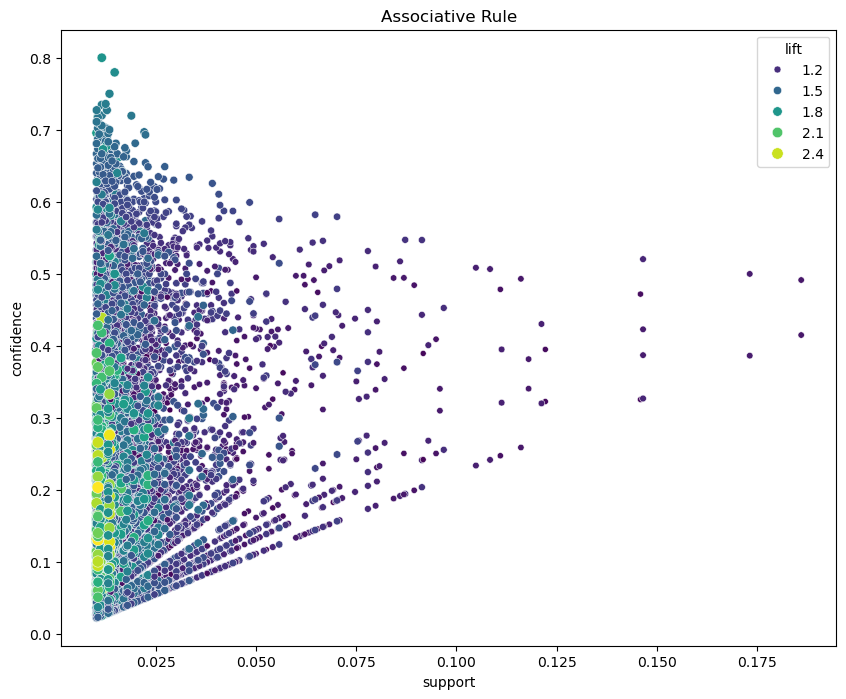

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis')
plt.title('Associative Rule')
plt.show()
